# 有向图可视化模板

NetworkX可视化有向图的代码模板。

同济子豪兄 2022-7-7

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
import matplotlib as mpl

## 创建有向图

In [3]:
seed = 13648
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

## 初步可视化

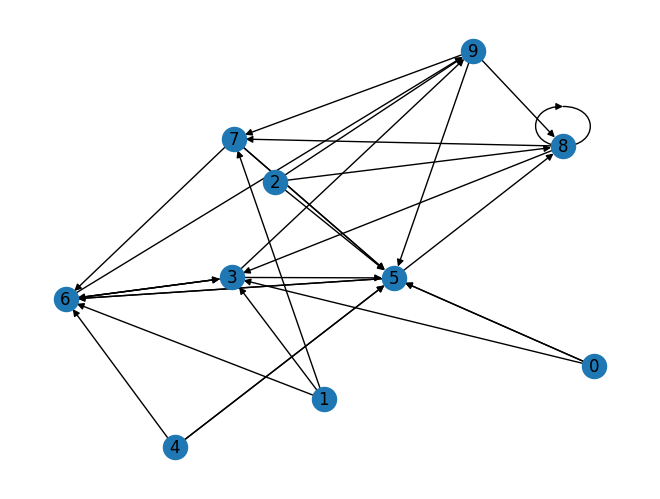

In [4]:
nx.draw(G, pos, with_labels=True)

## 高级可视化设置

In [5]:
# 节点大小
node_sizes = [12 + 10 * i for i in range(len(G))]

In [6]:
node_sizes

[12, 22, 32, 42, 52, 62, 72, 82, 92, 102]

In [7]:
# 节点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)

In [8]:
edge_colors

range(2, 32)

In [9]:
# 节点透明度
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

In [10]:
edge_alphas

[0.14705882352941177,
 0.17647058823529413,
 0.20588235294117646,
 0.23529411764705882,
 0.2647058823529412,
 0.29411764705882354,
 0.3235294117647059,
 0.35294117647058826,
 0.38235294117647056,
 0.4117647058823529,
 0.4411764705882353,
 0.47058823529411764,
 0.5,
 0.5294117647058824,
 0.5588235294117647,
 0.5882352941176471,
 0.6176470588235294,
 0.6470588235294118,
 0.6764705882352942,
 0.7058823529411765,
 0.7352941176470589,
 0.7647058823529411,
 0.7941176470588235,
 0.8235294117647058,
 0.8529411764705882,
 0.8823529411764706,
 0.9117647058823529,
 0.9411764705882353,
 0.9705882352941176,
 1.0]

In [11]:
# 配色方案
cmap = plt.cm.plasma
# cmap = plt.cm.Blues

C:\Users\12920\AppData\Local\Temp\ipykernel_34548\1160733156.py:7: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges = nx.draw_networkx_edges(
C:\Users\12920\AppData\Local\Temp\ipykernel_34548\1160733156.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(pc)


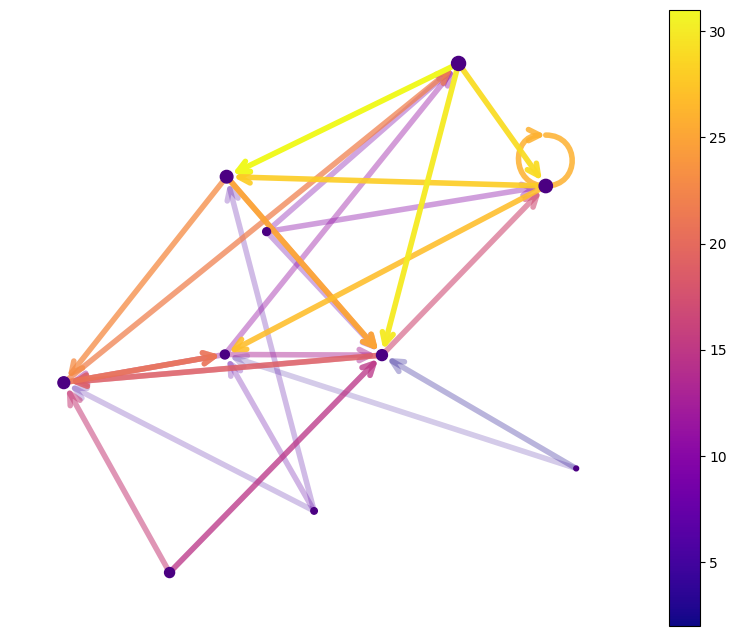

In [12]:
plt.figure(figsize=(10,8))

# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")

# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,   # 节点尺寸
    arrowstyle="->",        # 箭头样式
    arrowsize=20,           # 箭头尺寸
    edge_color=edge_colors, # 连接颜色
    edge_cmap=cmap,         # 连接配色方案
    width=4                # 连接线宽
)


# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

# 调色图例
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()